# Seattle Airbnb Project
The aim of this project is to show one's ability to follow the CRISP-DM process outlined for questions through communication, therefore the below code aims to gain insight on the above mentioned data.

Let us first import all the necessary libraries and the data sets

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

reviews = pd.read_csv('C:\\Users\\matom003\\OneDrive - Vodafone Group\\Desktop\\reviews.csv')
calender = pd.read_csv('C:\\Users\\matom003\\OneDrive - Vodafone Group\\Desktop\\calendar.csv')
listings = pd.read_csv('C:\\Users\\matom003\\OneDrive - Vodafone Group\\Desktop\\listings.csv')

calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [156]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [157]:
#number of unique values in each column
unique_values = calender.nunique(axis=0)
unique_values


listing_id    3818
date           365
available        2
price          669
dtype: int64

## Question 1: How do listing prices vary for different months and availability?
### Data Wranging

In [158]:
#Create the dummy variables for the categorical data and handle NAs as dummies as well
calender = pd.concat([calender, pd.get_dummies(calender['available'], dummy_na=False)], axis=1)
calender

,listing_id,date,available,price,f,t
0,241032,2016-01-04,t,$85.00,0,1
1,241032,2016-01-05,t,$85.00,0,1
2,241032,2016-01-06,f,NaN,1,0
3,241032,2016-01-07,f,NaN,1,0
4,241032,2016-01-08,f,NaN,1,0
...,...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,1,0
1393566,10208623,2016-12-30,f,NaN,1,0
1393567,10208623,2016-12-31,f,NaN,1,0
1393568,10208623,2017-01-01,f,NaN,1,0


In [159]:
#convert price to float
def to_float(x):
    if type(x) != float:
        return float(x[1:].replace(",", ""))
    else:
        return x

calender['price'] = calender['price'].apply(to_float)
calender.head()

,listing_id,date,available,price,f,t
0,241032,2016-01-04,t,85.0,0,1
1,241032,2016-01-05,t,85.0,0,1
2,241032,2016-01-06,f,NaN,1,0
3,241032,2016-01-07,f,NaN,1,0
4,241032,2016-01-08,f,NaN,1,0


In [160]:
#drop  rows with missing values in price
calender = calender.dropna(subset=['price'], axis=0)
calender.head()

,listing_id,date,available,price,f,t
0,241032,2016-01-04,t,85.0,0,1
1,241032,2016-01-05,t,85.0,0,1
9,241032,2016-01-13,t,85.0,0,1
10,241032,2016-01-14,t,85.0,0,1
14,241032,2016-01-18,t,85.0,0,1


In [161]:
#convert date to months
calender.loc[0:, 'month'] = pd.DatetimeIndex(calender['date']).month

C:\Users\matom003\Anaconda3\lib\site-packages\pandas\core\indexing.py:1678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value


In [164]:
calender

,listing_id,date,available,price,f,t,month
0,241032,2016-01-04,t,85.0,0,1,1.0
1,241032,2016-01-05,t,85.0,0,1,1.0
9,241032,2016-01-13,t,85.0,0,1,1.0
10,241032,2016-01-14,t,85.0,0,1,1.0
14,241032,2016-01-18,t,85.0,0,1,1.0
...,...,...,...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0,0,1,1.0
1393208,10208623,2016-01-07,t,87.0,0,1,1.0
1393211,10208623,2016-01-10,t,87.0,0,1,1.0
1393212,10208623,2016-01-11,t,87.0,0,1,1.0


In [163]:
#Pivot the data in months by column sums
monthly_sum = calender.groupby(['month']).sum()
monthly_sum = monthly_sum.reset_index()
monthly_sum

,month,listing_id,price,f,t
0,1.0,351244225865,7981548.0,0.0,64937.0
1,2.0,397147751252,9113355.0,0.0,73321.0
2,3.0,451919267421,10798161.0,0.0,83938.0
3,4.0,398739271361,10272371.0,0.0,76037.0
4,5.0,418598584732,11159008.0,0.0,79971.0
5,6.0,399417346553,11391415.0,0.0,77244.0
6,7.0,386025077499,11288732.0,0.0,74222.0
7,8.0,400094905899,11502179.0,0.0,76347.0
8,9.0,407809490913,11065949.0,0.0,77246.0
9,10.0,437806261817,11296639.0,0.0,82438.0


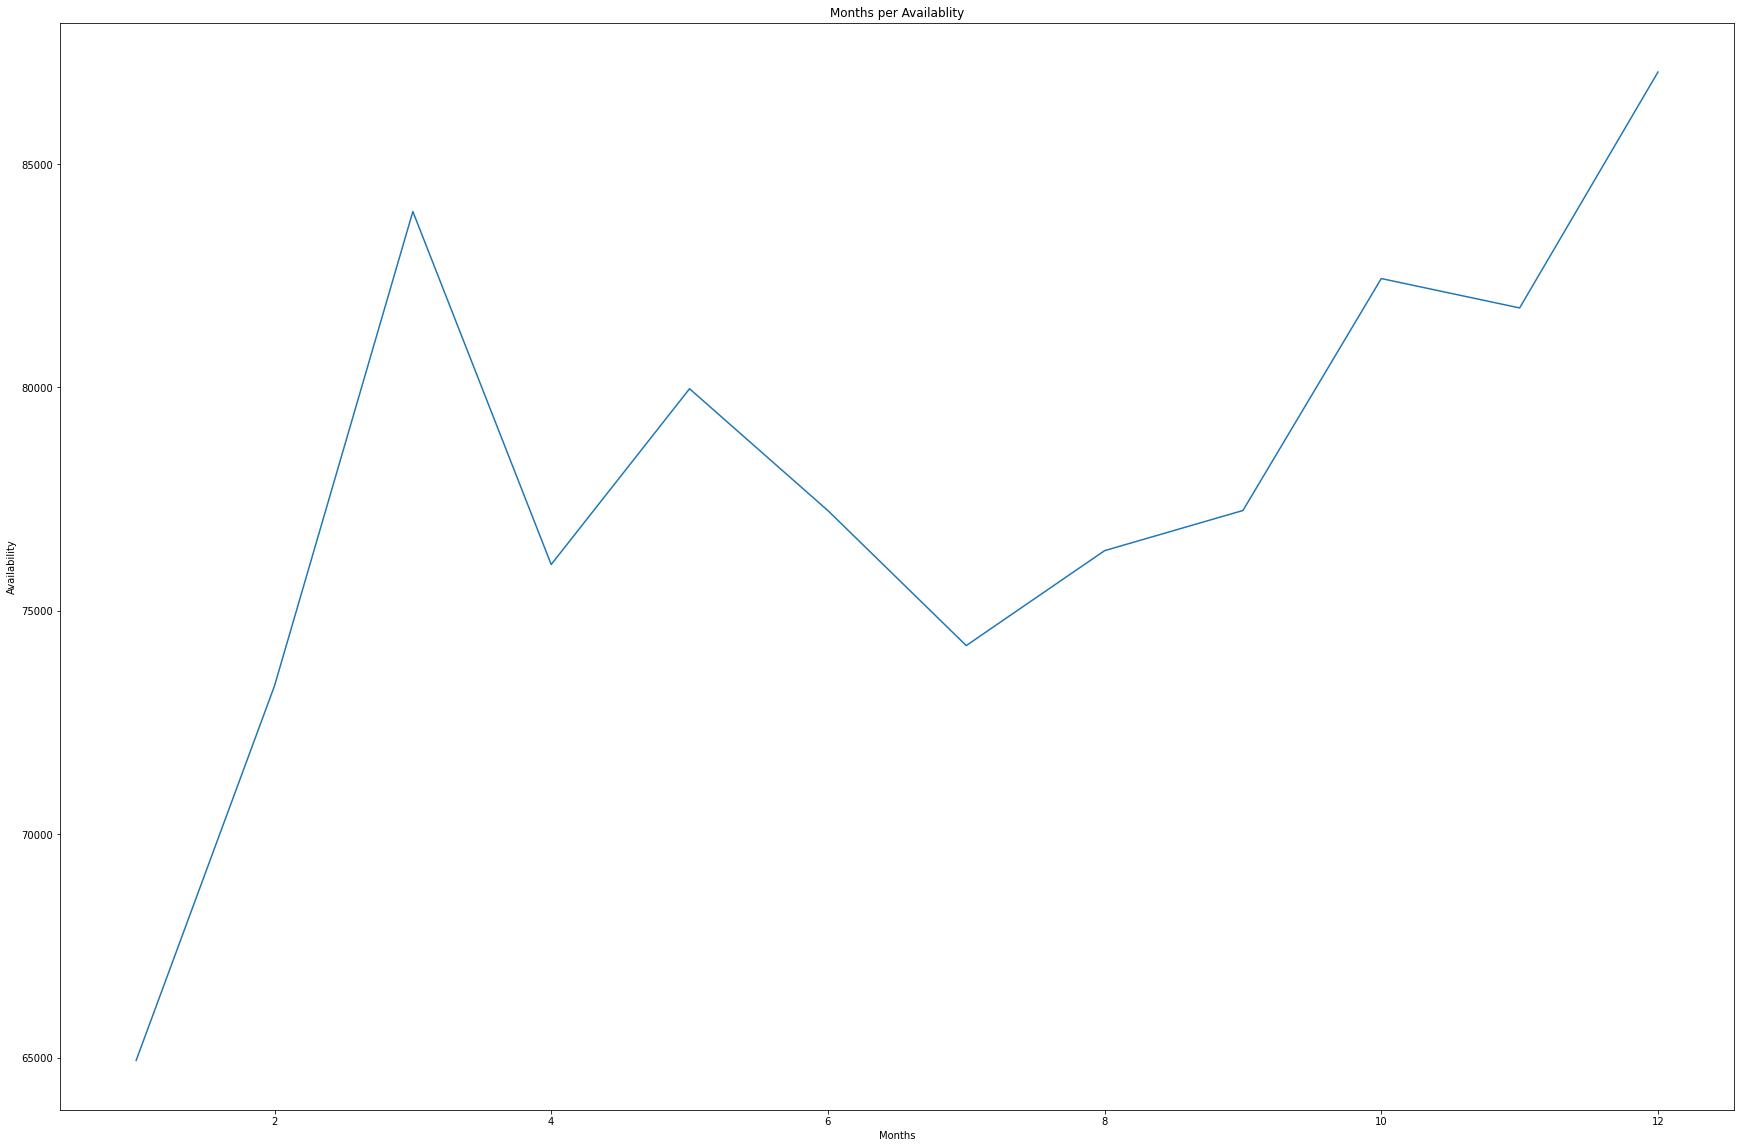

In [62]:
# plot month vs availability
plt.figure(figsize=(30, 20))
x = monthly_sum['month']
y = monthly_sum['t']
plt.plot(x,y)
plt.xlabel('Months')
plt.ylabel('Availability')
plt.title('Availablity per Month')
plt.show()

From the above plot, it can be seen that the availability of a listing decreases from month 3 to 11

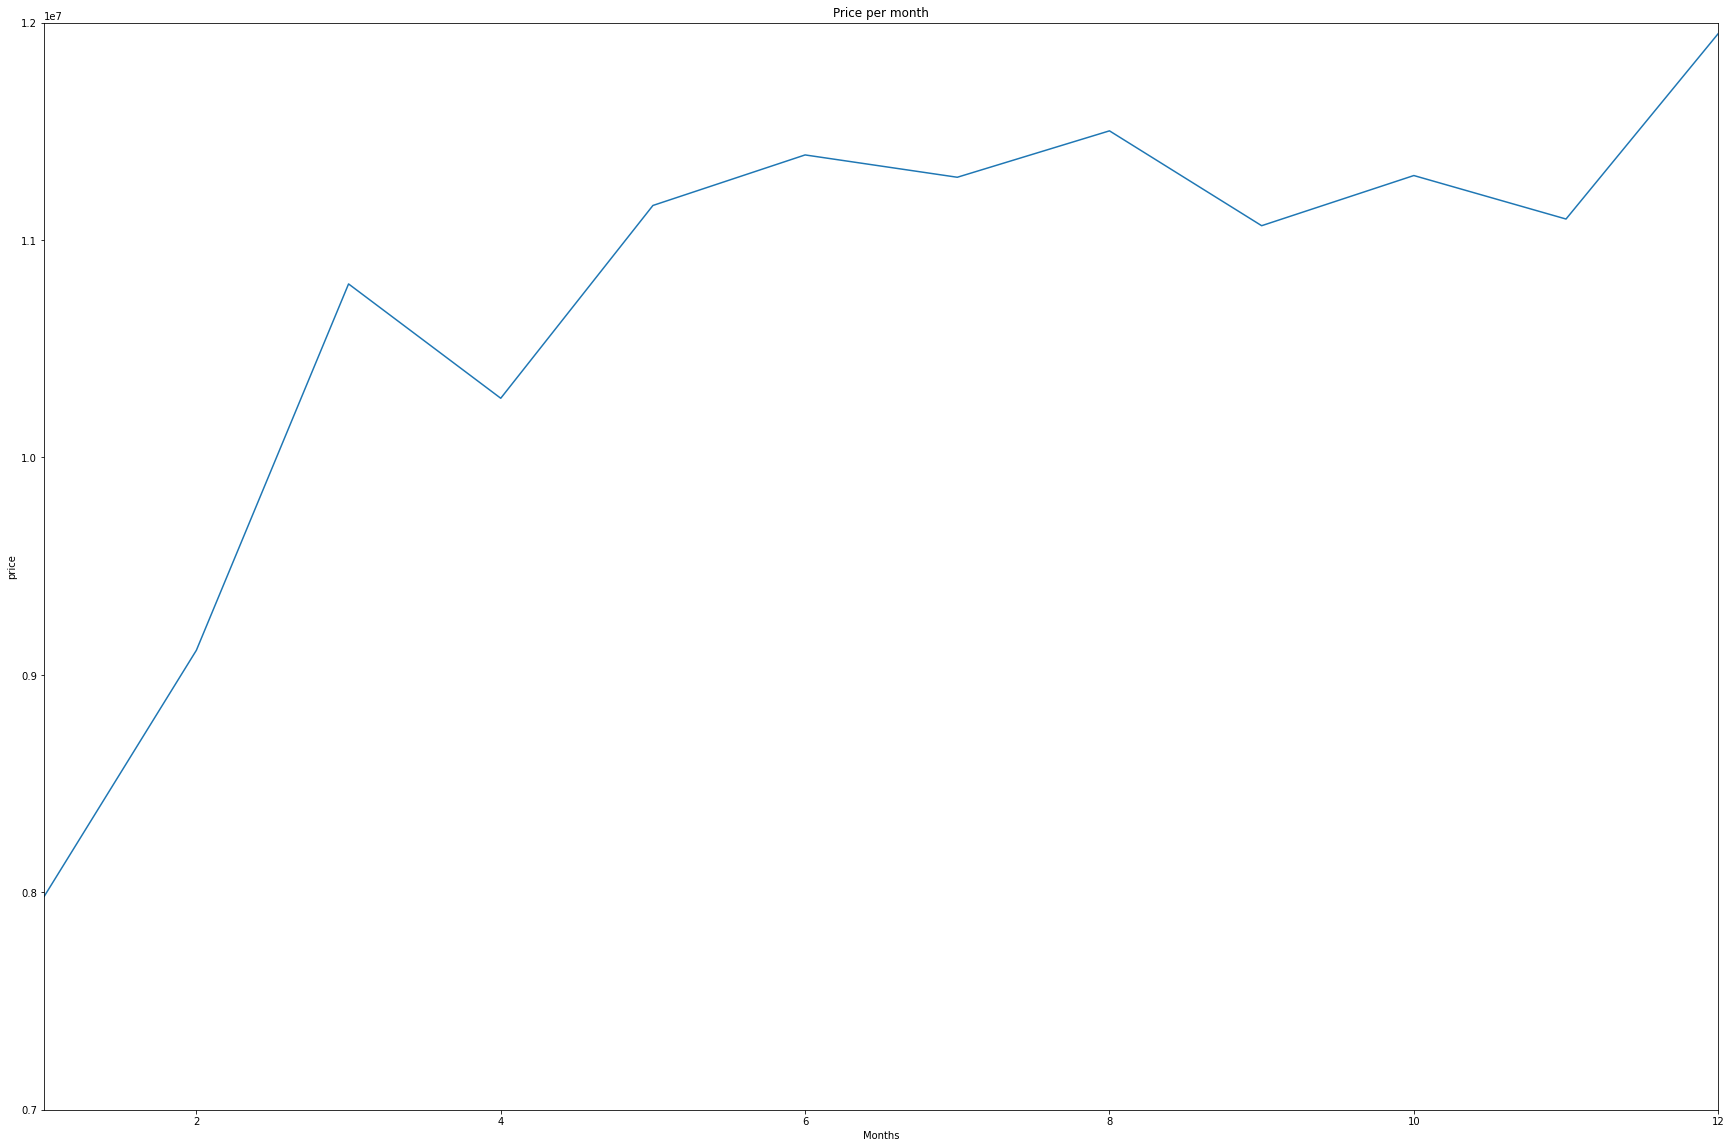

In [65]:
# plot price vs month
plt.figure(figsize=(30, 20))
x = monthly_sum['month']
y = monthly_sum['price']
plt.plot(x,y)
plt.xlabel('Months')
plt.ylabel('price')
plt.title('Price per month')
plt.axis([1, 12, 7000000, 12000000])
plt.show()

Note that as the availability decreases between month 3 and 11 and the price increases. This simply means that the months on which there is high demand for a listing yields in having high rates in renting so, the law of demand holds that demand for a product changes inversely to its price. 

In [165]:
monthly_sum[['month','price','t']].corr()

,month,price,t
month,1.000000,0.781866,0.654968
price,0.781866,1.000000,0.785661
t,0.654968,0.785661,1.000000


Note that the above correlation matrix proves that availability and months do have impact on the price of a listing, therefore we can safely say that indeed the price varies for different months and availability

###  Question 2: What can we deduce on the price of the listing per neighbourhood group and how does this differ per rating?

In [166]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [167]:
#number of unique values in each column
unique_values_listing = listings.nunique(axis=0)
unique_values_listing

id                                  3818
listing_url                         3818
scrape_id                              1
last_scraped                           1
name                                3792
                                    ... 
cancellation_policy                    3
require_guest_profile_picture          2
require_guest_phone_verification       2
calculated_host_listings_count        18
reviews_per_month                    654
Length: 92, dtype: int64

### Data Wrangling

In [168]:
#convert price to float
def to_float(x):
    if type(x) != float:
        return float(x[1:].replace(",", ""))
    else:
        return x

listings['price'] = listings['price'].apply(to_float)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [169]:
#pivot data by neighbourhood groups mean
listing_mean = listings.groupby(['neighbourhood_group_cleansed']).mean()
listing_mean.sort_values(['price'],inplace=True)
listing_mean = listing_mean.reset_index()
listing_mean

,neighbourhood_group_cleansed,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,Delridge,5.217371e+06,2.016010e+13,1.635080e+07,1.341772,1.341772,47.545983,-122.362599,2.860759,1.120253,...,95.861538,9.846154,9.738462,9.984615,9.969231,9.200000,9.676923,NaN,1.291139,2.182308
1,Northgate,5.566178e+06,2.016010e+13,1.710862e+07,1.862500,1.862500,47.702454,-122.325100,3.362500,1.151316,...,94.692308,9.723077,9.661538,9.846154,9.876923,9.353846,9.661538,NaN,1.725000,1.612121
2,Rainier Valley,5.282222e+06,2.016010e+13,1.572896e+07,4.716981,4.716981,47.554471,-122.281401,3.201258,1.224684,...,94.731343,9.619403,9.626866,9.776119,9.761194,9.052239,9.611940,NaN,2.339623,2.478881
3,Lake City,5.432238e+06,2.016010e+13,1.542281e+07,6.791045,6.791045,47.712153,-122.293985,2.701493,1.126866,...,94.375000,9.732143,9.535714,9.839286,9.821429,9.267857,9.571429,NaN,1.552239,1.544821
4,University District,6.414587e+06,2.016010e+13,1.518129e+07,13.467213,13.467213,47.662874,-122.314214,2.942623,1.127049,...,88.437500,9.136842,9.063158,9.357895,9.368421,9.252632,8.831579,NaN,13.270492,1.641429
5,Beacon Hill,5.052427e+06,2.016010e+13,1.502024e+07,2.822034,2.822034,47.569667,-122.306754,2.991525,1.230769,...,94.019417,9.592233,9.466019,9.834951,9.825243,9.097087,9.359223,NaN,2.720339,2.432233
6,Seward Park,5.548881e+06,2.016010e+13,1.635144e+07,2.977273,2.977273,47.554276,-122.268686,3.750000,1.250000,...,95.025641,9.666667,9.717949,9.897436,9.923077,9.282051,9.564103,NaN,2.977273,2.580513
7,Interbay,5.872783e+06,2.016010e+13,1.498236e+07,2.090909,2.090909,47.641729,-122.382653,2.363636,1.136364,...,93.777778,9.666667,9.777778,9.666667,9.777778,9.111111,9.666667,NaN,1.909091,2.022222
8,Other neighborhoods,5.235195e+06,2.016010e+13,1.472019e+07,5.324937,5.324937,47.670646,-122.335808,3.415617,1.247788,...,94.562500,9.637481,9.532925,9.798462,9.794793,9.637481,9.493088,NaN,2.856423,1.817139
9,Ballard,5.180190e+06,2.016010e+13,1.498283e+07,5.004348,5.004348,47.674525,-122.380150,3.443478,1.289130,...,95.533679,9.730570,9.668394,9.901554,9.927461,9.766839,9.569948,NaN,1.656522,2.570725


### Data visualization

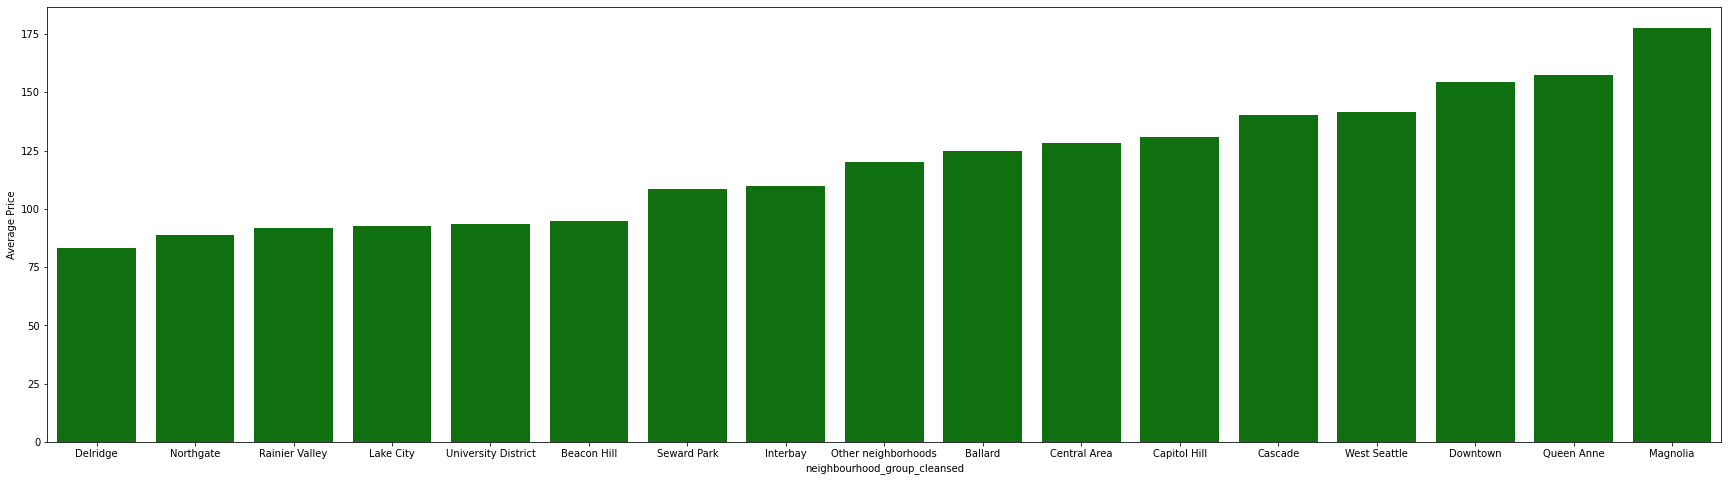

In [103]:
# plot price vs neighbourhood_group_cleansed
import seaborn as sb
plt.figure(figsize=(30,8))
sb.barplot(x='neighbourhood_group_cleansed',y='price',data=listing_mean,color='green')
plt.xlabel('neighbourhood_group_cleansed')
plt.ylabel('Average Price')
plt.show()


We can see from the above bar plot that the neighbourhood group with the lowest average price is Delridge while the group with the highest average price is Magnolia

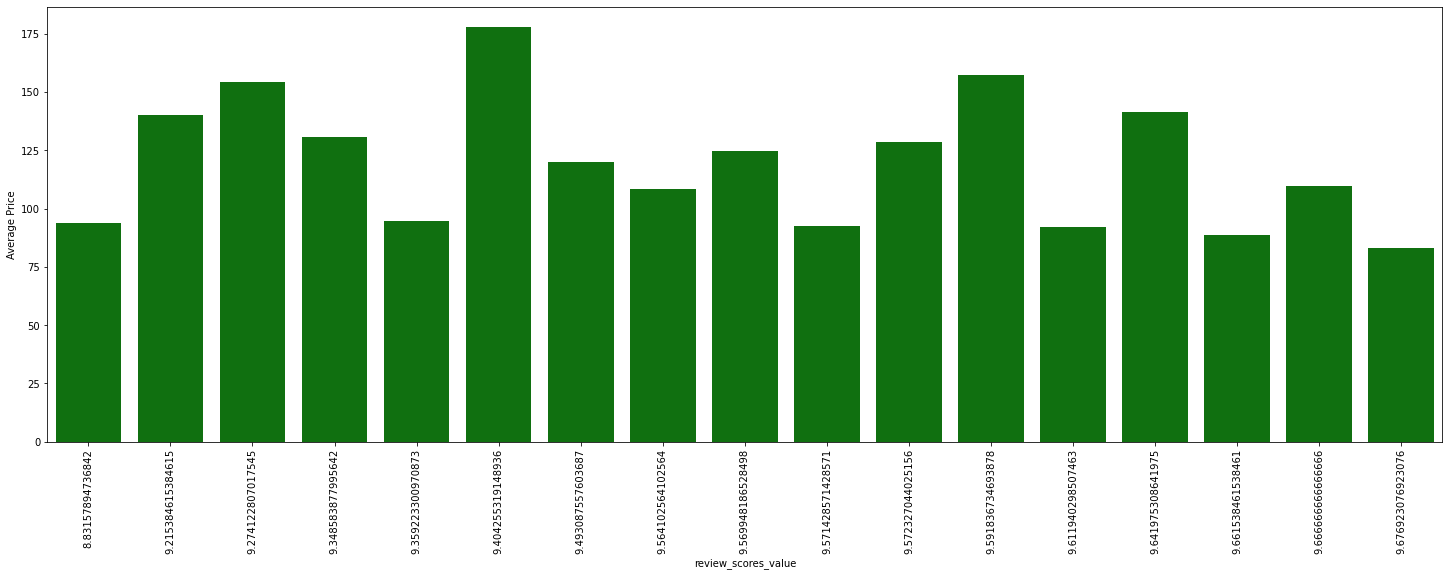

In [110]:
# plot price vs review_scores_value
import seaborn as sb
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
sb.barplot(x='review_scores_value',y='price',data=listing_mean,color='green')
plt.xlabel('review_scores_value')
plt.ylabel('Average Price')
plt.show()

From the above bar plot, not much can be deduced from it as prices do not show a clear trend with different review scores.

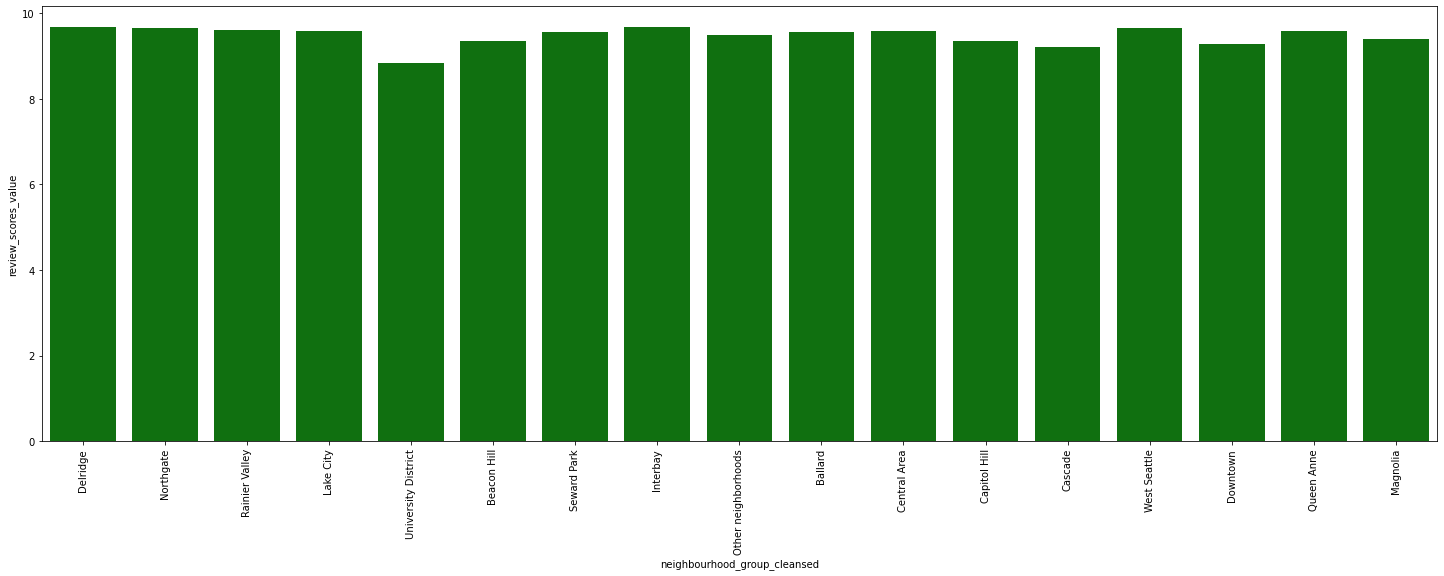

In [108]:
# plot review_scores_value vs neighbourhood_group_cleansed
import seaborn as sb
plt.figure(figsize=(25,8))
plt.xticks(rotation=90)
sb.barplot(x='neighbourhood_group_cleansed',y='review_scores_value',data=listing_mean,color='green')
plt.xlabel('neighbourhood_group_cleansed')
plt.ylabel('review_scores_value')
plt.show()

The review score vs neighbourhood group bar plot above shows a uniform distribution. We can safely conclude from the three bar plots above that review scores do not influence the price of a listing

## Question 3: Can one predict prices with the available data?
We would like to predict the price of a listing using the provided data with the below steps
### Explanatory Data Analysis

In [170]:
### lets see the columns with more that 40% of missing values
missing_percentage = (listings.isnull().mean() * 100)> 0.40
print(missing_percentage)

id                                  False
listing_url                         False
scrape_id                           False
last_scraped                        False
name                                False
                                    ...  
cancellation_policy                 False
require_guest_profile_picture       False
require_guest_phone_verification    False
calculated_host_listings_count      False
reviews_per_month                    True
Length: 92, dtype: bool


In [171]:
columns_with_missing_values = missing_percentage[missing_percentage].index

# Print the columns with more than 40% missing values
print(columns_with_missing_values)

Index(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'neighbourhood', 'bathrooms', 'square_feet',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'],
      dtype='object')


In [172]:
# drop the above mentioned column
listings_df = listings.drop(['summary', 'space', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'neighbourhood', 'bathrooms', 'square_feet',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month'], axis=1)

In [173]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 61 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   description                       3818 non-null   object 
 6   experiences_offered               3818 non-null   object 
 7   picture_url                       3818 non-null   object 
 8   host_id                           3818 non-null   int64  
 9   host_url                          3818 non-null   object 
 10  host_name                         3816 non-null   object 
 11  host_since                        3816 non-null   object 
 12  host_l

In [175]:
###let us filter out the columns we want to use in our model
listings_df = listings_df[['price','neighbourhood_group_cleansed','accommodates','bedrooms','beds','guests_included',
                              'extra_people','minimum_nights','maximum_nights']]
listings_df

,price,neighbourhood_group_cleansed,accommodates,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights
0,85.0,Queen Anne,4,1.0,1.0,2,$5.00,1,365
1,150.0,Queen Anne,4,1.0,1.0,1,$0.00,2,90
2,975.0,Queen Anne,11,5.0,7.0,10,$25.00,4,30
3,100.0,Queen Anne,3,0.0,2.0,1,$0.00,1,1125
4,450.0,Queen Anne,6,3.0,3.0,6,$15.00,1,1125
...,...,...,...,...,...,...,...,...,...
3813,359.0,Other neighborhoods,6,3.0,3.0,1,$0.00,3,1125
3814,79.0,Capitol Hill,4,1.0,2.0,3,$25.00,2,29
3815,93.0,Rainier Valley,2,1.0,1.0,2,$20.00,1,7
3816,99.0,Capitol Hill,2,0.0,1.0,1,$0.00,3,1125


In [176]:
###are there any missing values in our new dataframe?
missing_percentages = listings_df.isnull().mean() * 100
missing_percentages


price                           0.000000
neighbourhood_group_cleansed    0.000000
accommodates                    0.000000
bedrooms                        0.157150
beds                            0.026192
guests_included                 0.000000
extra_people                    0.000000
minimum_nights                  0.000000
maximum_nights                  0.000000
dtype: float64

In [177]:
#fill NA's in missing columns with column means 
listings_df['bedrooms'] = listings_df['bedrooms'].fillna(listings_df['bedrooms'].mean())
listings_df['beds'] = listings_df['beds'].fillna(listings_df['beds'].mean())


Here we are going to define a function that will convert an object column to float

In [179]:
#convert extra_people to float
def to_float(x):
    if type(x) != float:
        return float(x[1:].replace(",", ""))
    else:
        return x

listings_df['extra_people'] = listings_df['extra_people'].apply(to_float)
listings_df.head()

,price,neighbourhood_group_cleansed,accommodates,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights
0,85.0,Queen Anne,4,1.0,1.0,2,5.0,1,365
1,150.0,Queen Anne,4,1.0,1.0,1,0.0,2,90
2,975.0,Queen Anne,11,5.0,7.0,10,25.0,4,30
3,100.0,Queen Anne,3,0.0,2.0,1,0.0,1,1125
4,450.0,Queen Anne,6,3.0,3.0,6,15.0,1,1125


### Handlng Categorical data using get_dummies function

In [180]:
#get dummies for categorical columns
listings_df = pd.concat([listings_df, pd.get_dummies(listings_df['neighbourhood_group_cleansed'])], axis=1)
listings_df = listings_df.drop('neighbourhood_group_cleansed',axis =1)
listings_df

,price,accommodates,bedrooms,beds,guests_included,extra_people,minimum_nights,maximum_nights,Ballard,Beacon Hill,...,Interbay,Lake City,Magnolia,Northgate,Other neighborhoods,Queen Anne,Rainier Valley,Seward Park,University District,West Seattle
0,85.0,4,1.0,1.0,2,5.0,1,365,0,0,...,0,0,0,0,0,1,0,0,0,0
1,150.0,4,1.0,1.0,1,0.0,2,90,0,0,...,0,0,0,0,0,1,0,0,0,0
2,975.0,11,5.0,7.0,10,25.0,4,30,0,0,...,0,0,0,0,0,1,0,0,0,0
3,100.0,3,0.0,2.0,1,0.0,1,1125,0,0,...,0,0,0,0,0,1,0,0,0,0
4,450.0,6,3.0,3.0,6,15.0,1,1125,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,6,3.0,3.0,1,0.0,3,1125,0,0,...,0,0,0,0,1,0,0,0,0,0
3814,79.0,4,1.0,2.0,3,25.0,2,29,0,0,...,0,0,0,0,0,0,0,0,0,0
3815,93.0,2,1.0,1.0,2,20.0,1,7,0,0,...,0,0,0,0,0,0,1,0,0,0
3816,99.0,2,0.0,1.0,1,0.0,3,1125,0,0,...,0,0,0,0,0,0,0,0,0,0


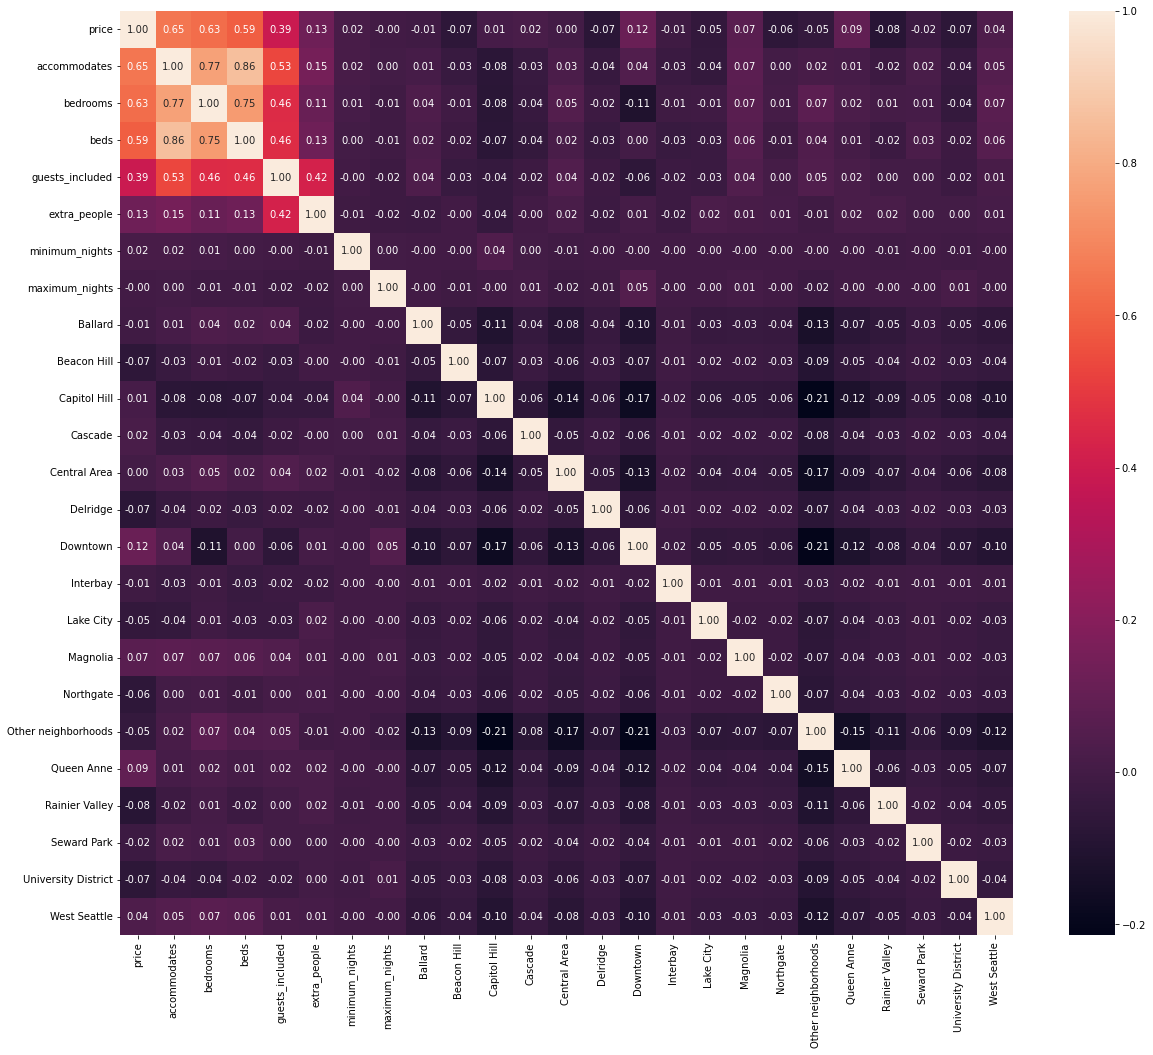

In [181]:
#correlation matrix to determine the correlation between explanatory variables and response variables
plt.figure(figsize=(20,17))
corr = listings_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Some x variables are highly correlated with each other, so lets drop one of them to avoid multicollinearity and noise within a regression model

In [182]:
#drop highly correlated x-variables
listings_df = listings_df.drop('beds',axis =1)

In [183]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                3818 non-null   float64
 1   accommodates         3818 non-null   int64  
 2   bedrooms             3818 non-null   float64
 3   guests_included      3818 non-null   int64  
 4   extra_people         3818 non-null   float64
 5   minimum_nights       3818 non-null   int64  
 6   maximum_nights       3818 non-null   int64  
 7   Ballard              3818 non-null   uint8  
 8   Beacon Hill          3818 non-null   uint8  
 9   Capitol Hill         3818 non-null   uint8  
 10  Cascade              3818 non-null   uint8  
 11  Central Area         3818 non-null   uint8  
 12  Delridge             3818 non-null   uint8  
 13  Downtown             3818 non-null   uint8  
 14  Interbay             3818 non-null   uint8  
 15  Lake City            3818 non-null   u

### Model build process
The model used to predict price is a linear regression model, the motivation to use this approach is that there is a linear relationship between the price and the independent variables

In [184]:
#Split into explanatory and response variables
X = listings_df[['accommodates','bedrooms','guests_included','extra_people','minimum_nights','maximum_nights','Ballard','Beacon Hill'
             ,'Capitol Hill','Cascade','Central Area','Delridge','Downtown','Interbay','Lake City','Magnolia','Northgate',
            'Other neighborhoods','Queen Anne','Rainier Valley','Seward Park','University District','West Seattle']]
y = listings_df['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.5384210368894999 on 1146 values.'

### Key insights:
We have found out that the r-squared score for this model is 0.538, which means just tells us how well our model is performing,  indicating that 54% of the variation in the dependent variable was explained by the independent variables in our model. This supports our hypothesis about predicting the price with the avaialable independent variables.